### Importación de datos



In [46]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [47]:
ingresoTienda1 = tienda1["Precio"].sum()
ingresoTienda2 = tienda2["Precio"].sum()
ingresoTienda3 = tienda3["Precio"].sum()
ingresoTienda4 = tienda4["Precio"].sum()
ingresoTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso total": [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4]
})
pd.set_option('display.float_format', '{:,.0f}'.format)
ingresoTiendas.head()

,Tienda,Ingreso total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


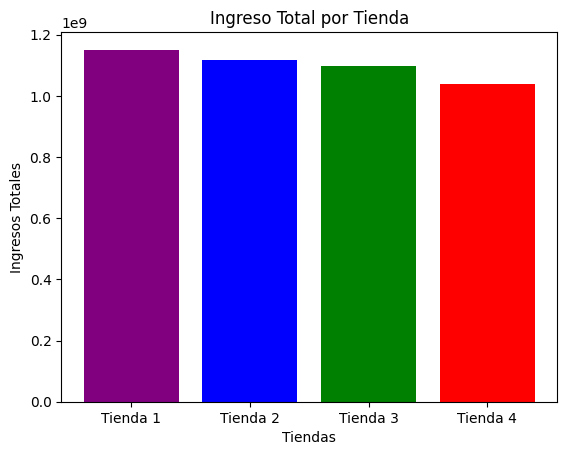

In [48]:
import matplotlib.pyplot as plt

colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
plt.bar(ingresoTiendas["Tienda"],ingresoTiendas["Ingreso total"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Ingresos Totales')  # Etiquetamos el eje y
plt.title('Ingreso Total por Tienda')  # Añadimos un título al gráfico
plt.show()

# 2. Ventas por categoría

In [49]:
conteoCategoriaT1 = tienda1['Categoría del Producto'].value_counts()
conteoCategoriaT2 = tienda2['Categoría del Producto'].value_counts()
conteoCategoriaT3 = tienda3['Categoría del Producto'].value_counts()
conteoCategoriaT4 = tienda4['Categoría del Producto'].value_counts()
conteosCategorias = pd.DataFrame({
    'Tienda 1': conteoCategoriaT1,
    'Tienda 2': conteoCategoriaT2,
    'Tienda 3': conteoCategoriaT3,
    'Tienda 4': conteoCategoriaT4
})
conteosCategorias = conteosCategorias.fillna(0)
# Sumar los conteos de todas las tiendas
conteosCategorias['Total'] = conteosCategorias.sum(axis=1)

# Ordenar por 'Total' de mayor a menor
conteosOrdenado = conteosCategorias.sort_values(by='Total', ascending=False)

# Seleccionar las 3 categorías con más cantidad
top3 = conteosOrdenado.head(3)

top3.head()



,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Muebles,465,442,499,480,1886
Electrónicos,448,422,451,451,1772
Juguetes,324,313,315,338,1290


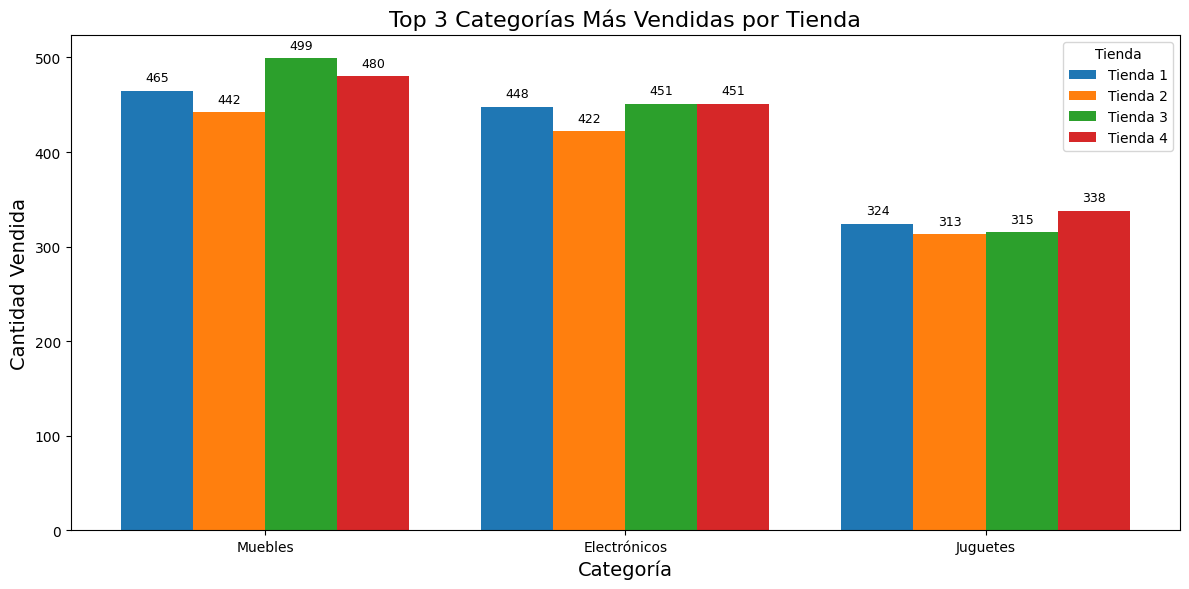

In [50]:
import matplotlib.pyplot as plt
import numpy as np
categorias = top3.index.tolist()  # ['Muebles', 'Electrónicos', 'Juguetes']
tienda1 = top3['Tienda 1'].tolist()
tienda2 = top3['Tienda 2'].tolist()
tienda3 = top3['Tienda 3'].tolist()
tienda4 = top3['Tienda 4'].tolist()
# Número de categorías
n_categorias = len(categorias)
indice = np.arange(n_categorias)  # posiciones: 0, 1, 2
ancho = 0.2  # Ancho de cada barra

# Crear la gráfica
plt.figure(figsize=(12,6))

# Dibujar una barra para cada tienda
plt.bar(indice - 1.5*ancho, tienda1, width=ancho, label='Tienda 1')
plt.bar(indice - 0.5*ancho, tienda2, width=ancho, label='Tienda 2')
plt.bar(indice + 0.5*ancho, tienda3, width=ancho, label='Tienda 3')
plt.bar(indice + 1.5*ancho, tienda4, width=ancho, label='Tienda 4')

# Configurar etiquetas
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.title('Top 3 Categorías Más Vendidas por Tienda', fontsize=16)
plt.xticks(indice, categorias)  # Poner las categorías en el eje X
plt.legend(title='Tienda')

# Mostrar valores arriba de cada barra
for i in range(n_categorias):
    plt.text(indice[i] - 1.5*ancho, tienda1[i] + 10, str(int(tienda1[i])), ha='center', fontsize=9)
    plt.text(indice[i] - 0.5*ancho, tienda2[i] + 10, str(int(tienda2[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 0.5*ancho, tienda3[i] + 10, str(int(tienda3[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 1.5*ancho, tienda4[i] + 10, str(int(tienda4[i])), ha='center', fontsize=9)

# Ajustar diseño
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda